## Star Wars Survey

We are interested in answering some questions about Star Wars fans. In particular, we wonder if **the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch**.

To do this, we are going to use a dataset surveyed from Star Wars fans using the online tool SurveyMonkey. There were 835 total responses, which one can download from the GitHub repository, [Star Wars Survey](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey).

In [196]:
import pandas as pd

star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [197]:
print(star_wars.head(3))

   RespondentID Have you seen any of the 6 films in the Star Wars franchise?  \
0    3292879998                                                Yes             
1    3292879538                                                 No             
2    3292765271                                                Yes             

  Do you consider yourself to be a fan of the Star Wars film franchise?  \
0                                                Yes                      
1                                                NaN                      
2                                                 No                      

  Which of the following Star Wars films have you seen? Please select all that apply.  \
0           Star Wars: Episode I  The Phantom Menace                                    
1                                                NaN                                    
2           Star Wars: Episode I  The Phantom Menace                                    

                     

## Cleaning and Mapping Yes/No Columns

In [198]:
yes_no = {'Yes': True, 'No': False}

star_wars["Have you seen any of the 6 films in the Star Wars franchise?"] = star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].map(yes_no)
star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] = star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].map(yes_no)

In [199]:
print(star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].value_counts())

Have you seen any of the 6 films in the Star Wars franchise?
True     936
False    250
Name: count, dtype: int64


## Cleaning and Mapping Checkbox Columns

In [200]:
print(star_wars.columns[3:9])

Index(['Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'],
      dtype='object')


In [201]:
star_wars = star_wars.rename(columns=dict(zip(star_wars.columns[3:9], [f"seen_{i}" for i in range(1, 7)])))

In [202]:
import numpy as np

movie_mapping = {
    "Star Wars: Episode I  The Phantom Menace": True,
    np.nan: False,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True
}

for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(movie_mapping)

In [203]:
star_wars[star_wars.columns[3:9]].head(6)

,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6
0,True,True,True,True,True,True
1,False,False,False,False,False,False
2,True,True,True,False,False,False
3,True,True,True,True,True,True
4,True,True,True,True,True,True
5,True,True,True,True,True,True


## Cleaning the Ranking Columns

In [204]:
# Convert each of the columns above to a float type
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [205]:
# Give each column a more descriptive name
rankings = dict(zip((star_wars.columns[9:15]), [f"ranking_{i}" for i in range(1,7)]))
star_wars = star_wars.rename(columns=rankings)

In [206]:
star_wars[star_wars.columns[9:15]].head(6)

,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
0,3.0,2.0,1.0,4.0,5.0,6.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,2.0,3.0,4.0,5.0,6.0
3,5.0,6.0,1.0,2.0,4.0,3.0
4,5.0,4.0,6.0,2.0,1.0,3.0
5,1.0,4.0,3.0,6.0,5.0,2.0


## Finding the Highest-Ranked Movie

In [207]:
mean_ranking = star_wars[star_wars.columns[9:15]].mean()
print(mean_ranking.sort_values(ascending=False))

ranking_3    4.341317
ranking_2    4.087321
ranking_1    3.732934
ranking_4    3.272727
ranking_6    3.047847
ranking_5    2.513158
dtype: float64


<BarContainer object of 6 artists>

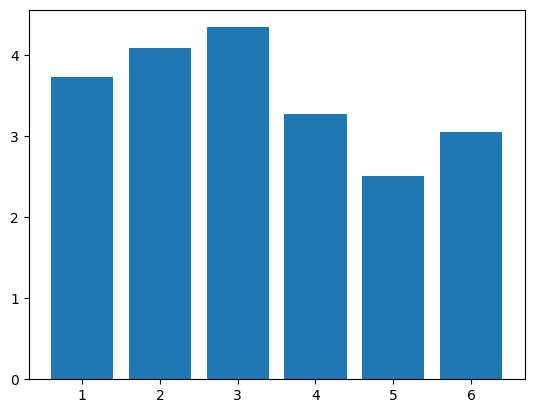

In [208]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.bar(range(1,7), mean_ranking)

The average ranking for each movie indicates that the original movies (episodes 4-6) were ranked higher than the prequels (episodes 1-3), suggesting respondents generally preferred the original trilogy.

## Finding the Most Viewed Movie


In [209]:
star_wars[star_wars.columns[3:9]].head(6)

,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6
0,True,True,True,True,True,True
1,False,False,False,False,False,False
2,True,True,True,False,False,False
3,True,True,True,True,True,True
4,True,True,True,True,True,True
5,True,True,True,True,True,True


In [210]:
star_wars[star_wars.columns[3:9]].sum()

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64

<BarContainer object of 6 artists>

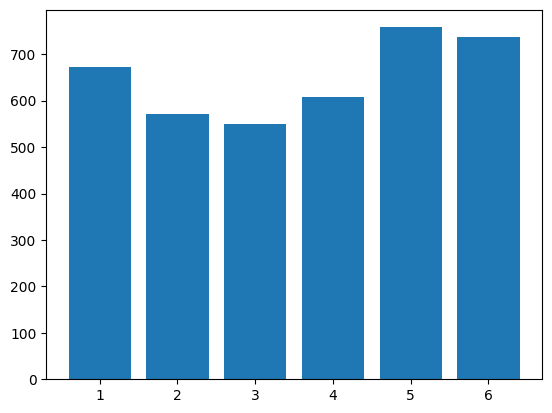

In [211]:
plt.bar(range(1,7), star_wars[star_wars.columns[3:9]].sum())

The original trilogy (episodes 4-6) has the highest view counts. This is likely because the original trilogy was released before the prequel trilogy, giving it more time to reach a wider audience.

__Correlation between Rankings and View Counts__  
The average rankings and view counts show a correlation, with Episodes 5 and 6 being both the most viewed and the most highly rated. This suggests that the movies that were seen by the most respondents were also generally preferred by them.

## Exploring the Data by Binary Segments

### Finding the Highest-Ranked Movie by Genders

In [212]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

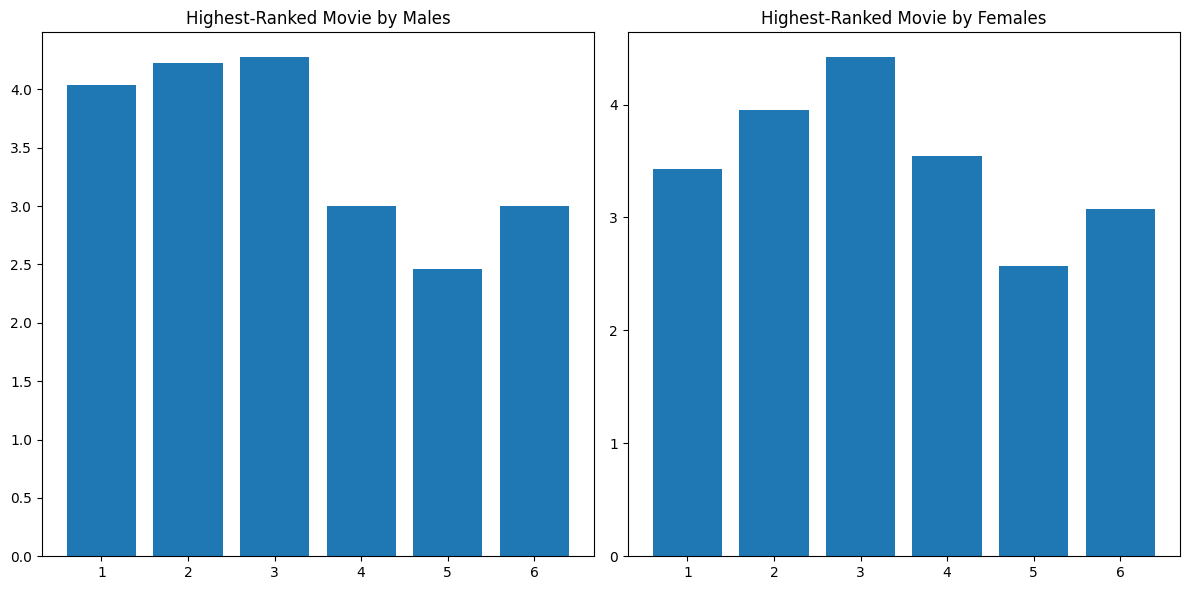

In [213]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].bar(range(1,7), males[males.columns[9:15]].mean())
axs[0].set_title('Highest-Ranked Movie by Males')

axs[1].bar(range(1,7), females[females.columns[9:15]].mean())
axs[1].set_title('Highest-Ranked Movie by Females')

plt.tight_layout()
plt.show()

### Finding the Most Viewed Movie by Genders

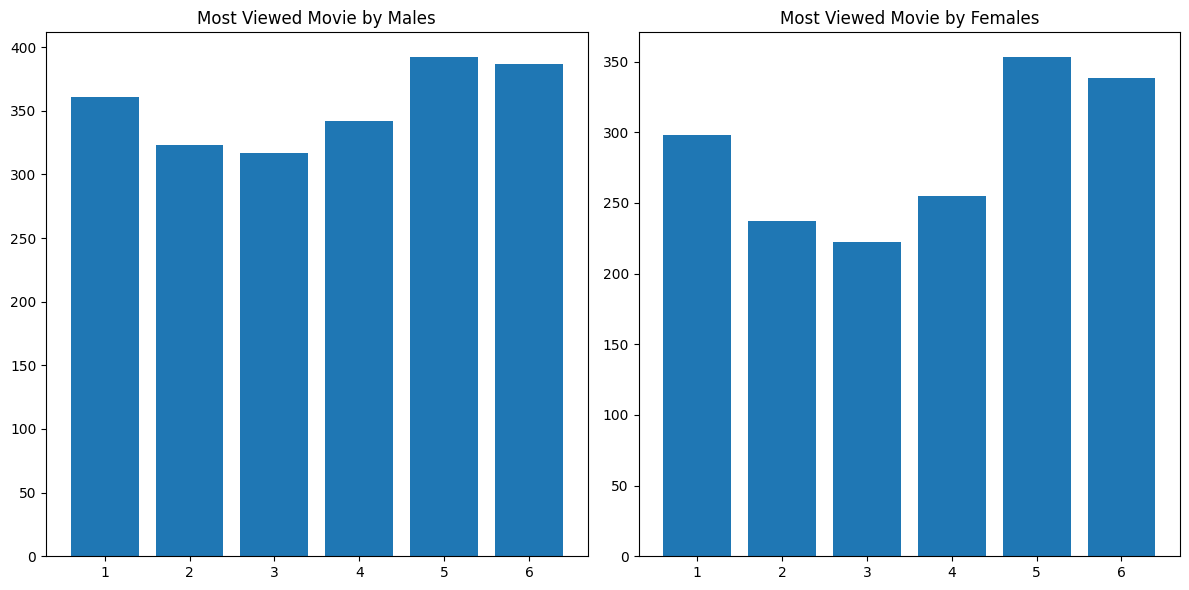

In [214]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].bar(range(1,7), males[males.columns[3:9]].sum())
axs[0].set_title('Most Viewed Movie by Males')

axs[1].bar(range(1,7), females[females.columns[3:9]].sum())
axs[1].set_title('Most Viewed Movie by Females')

plt.tight_layout()
plt.show()

**Male/female differences in favorite Star Wars movie and most-seen movie**  
Males watched the prequels (episodes 1-3) more often than females, but females who watched them tended to like them more, giving them higher ratings.

## Average Star Wars movie rankings by age group

In [215]:
star_wars.groupby("Age")[star_wars.columns[9:15]].mean()

,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
Age,,,,,,
18-29,4.100000,4.100000,3.966667,2.994444,2.722222,3.116667
30-44,4.347826,4.309179,4.475728,2.932367,2.212560,2.714976
45-60,3.541667,4.170833,4.537500,3.308333,2.437500,3.004167
> 60,3.010417,3.761658,4.316062,3.808290,2.730570,3.357513


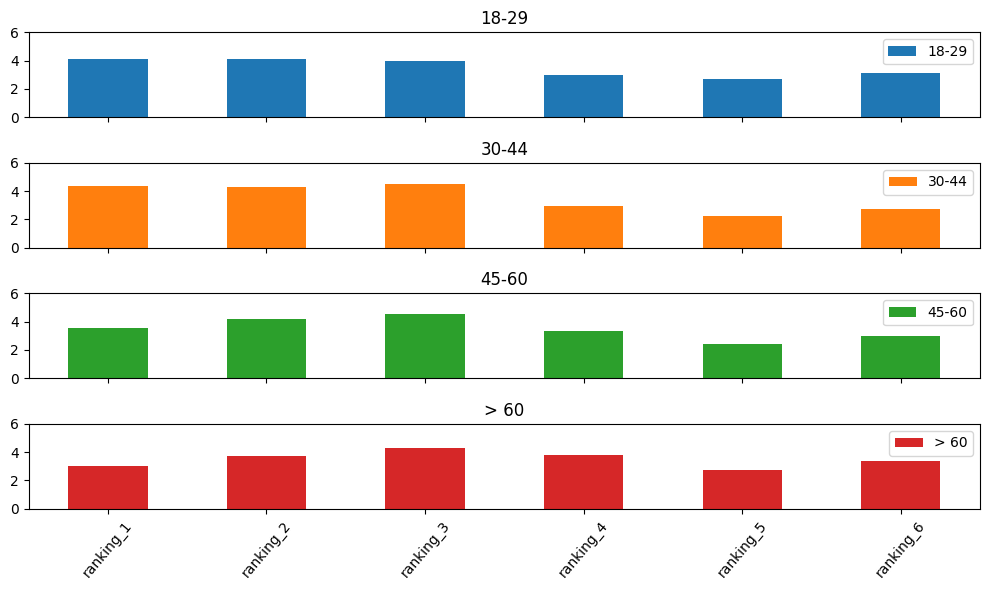

In [216]:
mean_rankings = star_wars.groupby("Age")[star_wars.columns[9:15]].mean()
mean_rankings.T.plot(kind='bar', subplots=True, figsize=(10,6), ylim=(0,6), rot=50)
plt.tight_layout()
plt.show()

The original trilogy (episodes 4-6) are consistently ranked high (have lower ranking numbers) across all age groups, indicating a general preference for these films regardless of age. This suggests that the original trilogy remains widely popular across different age demographics.

In [217]:
mean_locations = star_wars.groupby("Location (Census Region)")[star_wars.columns[9:15]].mean()
mean_locations

,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
Location (Census Region),,,,,,
East North Central,3.723881,4.074627,4.410448,3.358209,2.373134,3.059701
East South Central,3.875000,4.593750,4.375000,2.875000,2.250000,3.031250
Middle Atlantic,3.924731,4.215054,4.413043,3.064516,2.440860,2.924731
Mountain,4.000000,4.000000,4.279412,2.970588,2.794118,2.955882
New England,4.203390,4.166667,4.133333,3.083333,2.516667,2.866667
Pacific,3.582192,3.821918,4.171233,3.219178,2.739726,3.465753
South Atlantic,3.684211,4.180451,4.443609,3.406015,2.398496,2.887218
West North Central,3.671053,4.105263,4.355263,3.368421,2.552632,2.947368
West South Central,3.394737,4.118421,4.473684,3.657895,2.421053,2.934211


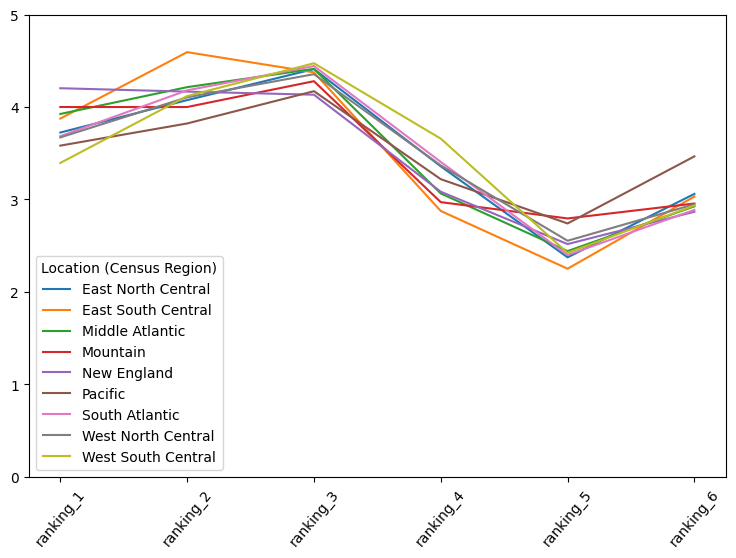

In [218]:
mean_locations.T.plot(kind='line', figsize=(9,6), ylim=(0,5), rot=50)
plt.show()

The line graph shows the average ranking of Star Wars movies across different locations in the United States, categorized by Census Region. The graph reveals *a consistent pattern across regions, with the original trilogy (Episodes 4-6) receiving lower average rankings, indicating a higher preference*.

## Conclusion

The analysis reveals that across different **genders, age groups, and locations**, the `original trilogy (Episodes 4-6)` is consistently favored by the respondents.

## Analyze character sentiment

In [219]:
characters = [
    "Luke Skywalker",
    "Han Solo",
    "Princess Leia Organa",
    "Obi-Wan Kenobi",
    "Yoda",
    "R2-D2",
    "C-3PO",
    "Anakin Skywalker",
    "Darth Vader",
    "Lando Calrissian",
    "Padmé Amidala",
    "Boba Fett",
    "Emperor Palpatine",
    "Jar Jar Binks"
]

for col in star_wars.columns[15:29]:
    star_wars[col] = star_wars[col].str.lower()
characters_mapping = dict(zip((star_wars.columns[15:29]),(characters)))
star_wars = star_wars.rename(columns=characters_mapping)

In [220]:
star_wars[star_wars.columns[15:29]].head(6)

,Luke Skywalker,Han Solo,Princess Leia Organa,Obi-Wan Kenobi,Yoda,R2-D2,C-3PO,Anakin Skywalker,Darth Vader,Lando Calrissian,Padmé Amidala,Boba Fett,Emperor Palpatine,Jar Jar Binks
0,very favorably,very favorably,very favorably,very favorably,very favorably,very favorably,very favorably,unfamiliar (n/a),unfamiliar (n/a),very favorably,very favorably,very favorably,very favorably,very favorably
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,somewhat favorably,somewhat favorably,somewhat favorably,somewhat favorably,somewhat favorably,unfamiliar (n/a),unfamiliar (n/a),unfamiliar (n/a),unfamiliar (n/a),unfamiliar (n/a),unfamiliar (n/a),unfamiliar (n/a),unfamiliar (n/a),unfamiliar (n/a)
3,very favorably,very favorably,very favorably,very favorably,very favorably,somewhat favorably,very favorably,somewhat favorably,somewhat unfavorably,very favorably,very favorably,very favorably,very favorably,very favorably
4,very favorably,somewhat favorably,somewhat favorably,somewhat unfavorably,very favorably,very unfavorably,somewhat favorably,neither favorably nor unfavorably (neutral),very favorably,somewhat favorably,somewhat favorably,very unfavorably,somewhat favorably,somewhat favorably
5,very favorably,very favorably,very favorably,very favorably,very favorably,neither favorably nor unfavorably (neutral),very favorably,neither favorably nor unfavorably (neutral),somewhat favorably,somewhat favorably,somewhat favorably,somewhat favorably,neither favorably nor unfavorably (neutral),very favorably


In [221]:
# Count favorable responses for each character
favorable_counts = {}
for col in star_wars.columns[15:29]:
    favorable_count = (star_wars[col] == "very favorably").sum() + (star_wars[col] == "somewhat favorably").sum()
    favorable_counts[col] = favorable_count

favorable_counts = pd.Series(favorable_counts)
print(favorable_counts.sort_values(ascending=False))

Han Solo                771
Luke Skywalker          761
Princess Leia Organa    757
Yoda                    750
Jar Jar Binks           749
Padmé Amidala           747
Lando Calrissian        703
Obi-Wan Kenobi          514
C-3PO                   481
Anakin Skywalker        365
Emperor Palpatine       351
Darth Vader             291
R2-D2                   253
Boba Fett               242
dtype: int64


In [222]:
# Count neutral responses for each character
neutral_counts = {}
for col in star_wars.columns[15:29]:
    neutral_count = (star_wars[col] == "neither favorably nor unfavorably (neutral)").sum()
    neutral_counts[col] = neutral_count

neutral_counts = pd.Series(neutral_counts)
print(neutral_counts.sort_values(ascending=False))

Darth Vader             248
Anakin Skywalker        236
R2-D2                   213
Emperor Palpatine       207
Boba Fett               164
Obi-Wan Kenobi          135
C-3PO                    84
Lando Calrissian         79
Padmé Amidala            57
Jar Jar Binks            51
Princess Leia Organa     48
Luke Skywalker           44
Yoda                     43
Han Solo                 38
dtype: int64


**Which character do respondents like the most?   
Which character do respondents dislike the most?**

<Axes: >

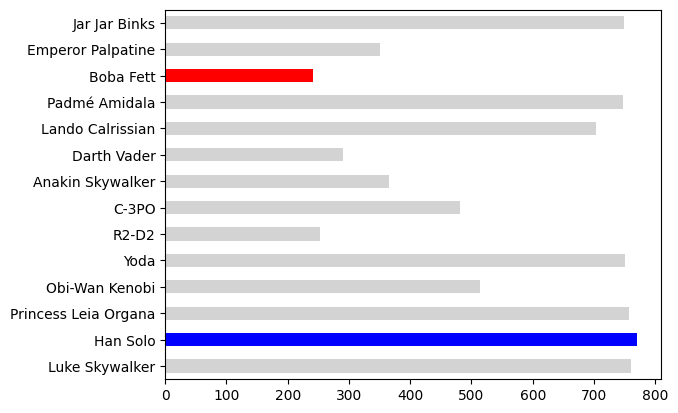

In [223]:
favorable_counts.plot.barh(color=['blue' if v == favorable_counts.max() else 'red' if v == favorable_counts.min() else 'lightgray' for v in favorable_counts])

**Which character(s) to be the most controversial (split between likes and dislikes)?**

<Axes: >

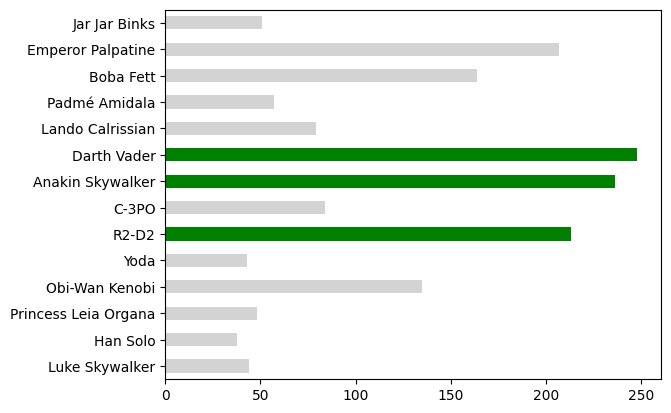

In [224]:
neutral_counts.plot.barh(color=['green' if n in neutral_counts.nlargest(3).values else 'lightgray' for n in neutral_counts])

In [225]:
# Compare counts to determine the most and least liked character
most_liked_character = favorable_counts.idxmax()
print(f"The character the respondents like the most is {most_liked_character}.")

least_liked_character = favorable_counts.idxmin()
print(f"The character the respondents dislike the most is {least_liked_character}.")

# The most controversial (split between likes and dislikes) characters
most_controversial_characters = (neutral_counts.sort_values(ascending=False)).index[0:3].to_list()
print(f"The most neutral characters are {', '.join(most_controversial_characters[:-1])}, and {most_controversial_characters[-1]}.")

The character the respondents like the most is Han Solo.
The character the respondents dislike the most is Boba Fett.
The most neutral characters are Darth Vader, Anakin Skywalker, and R2-D2.
